In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston

In [3]:
boston=load_boston()

In [6]:
data=boston.data

In [7]:
feature_names=boston.feature_names

In [8]:
x=pd.DataFrame(data, columns=feature_names)

In [9]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
x.shape

(506, 13)

In [12]:
target=boston.target

In [14]:
y=pd.DataFrame(target, columns=['price'])

In [15]:
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [16]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
price    506 non-null float64
dtypes: float64(1)
memory usage: 4.1 KB


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler=StandardScaler()

In [25]:
x_train_scaled=scaler.fit_transform(x_train)

In [26]:
x_test_scaled=scaler.transform(x_test)

In [27]:
x_train_scaled=pd.DataFrame(x_train_scaled, columns=feature_names)

In [29]:
x_test_scaled=pd.DataFrame(x_test_scaled, columns=feature_names)

In [31]:
from sklearn.manifold import TSNE

In [32]:
tsne=TSNE(n_components=2, learning_rate=250, random_state=42)

In [33]:
x_train_tsne=tsne.fit_transform(x_train_scaled)

In [34]:
x_train_tsne

array([[ 17.645624  ,  28.406218  ],
       [  1.6133794 , -11.563689  ],
       [-14.5985    , -16.157717  ],
       [ 27.65398   ,  24.220755  ],
       [  3.8739002 ,  -9.40449   ],
       [ -2.0326433 , -15.587415  ],
       [ -0.48839292, -14.178003  ],
       [-23.318121  , -13.778156  ],
       [ 27.593517  ,  25.564125  ],
       [ 24.52684   ,  24.971394  ],
       [ -0.4837361 , -14.802191  ],
       [ -4.706522  ,  -6.1135483 ],
       [ -7.6053567 ,  -2.4791708 ],
       [ 25.225407  ,  24.14793   ],
       [ -9.633202  ,  -3.0656078 ],
       [  9.137457  ,  -6.7359676 ],
       [  2.062477  ,  -6.3994236 ],
       [-15.625919  , -16.7226    ],
       [-10.261498  , -14.384683  ],
       [-10.831577  , -18.551825  ],
       [ 23.060835  ,  28.409035  ],
       [  0.7136497 ,  -3.6644816 ],
       [ -3.6749017 , -16.457159  ],
       [ -0.679544  , -11.812288  ],
       [-23.207016  , -14.088349  ],
       [ -6.919917  ,  -2.852082  ],
       [  0.6825832 ,  11.351543  ],
 

In [35]:
x_train_tsne.shape

(404, 2)

In [38]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

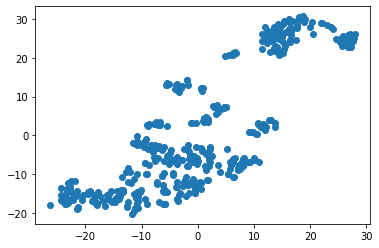

In [62]:
plt.scatter(x_train_tsne [:,0], x_train_tsne [:, 1])

In [63]:
from sklearn.cluster import KMeans

In [64]:
kmeans=KMeans(init ="random", n_clusters=3, n_init=10, max_iter=100, random_state=42)

In [65]:
labels_train=kmeans.fit_predict(x_train_scaled)

In [66]:
pd.value_counts(labels_train)

1    191
2    128
0     85
dtype: int64

In [67]:
labels_test=kmeans.predict(x_test_scaled)

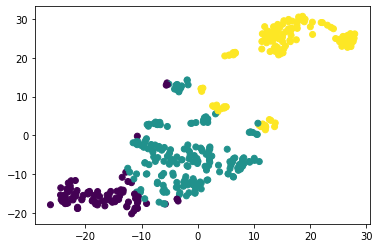

In [69]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], c=labels_train)

In [70]:
y_train.mean()

price    22.796535
dtype: float64

In [114]:
y_train[labels_train==0].mean()

price    27.874118
dtype: float64

In [72]:
y_train[labels_train==1].mean()

price    24.971204
dtype: float64

In [115]:
y_train[labels_train==2].mean()

price    16.179688
dtype: float64

Text(0.5, 0, 'price')

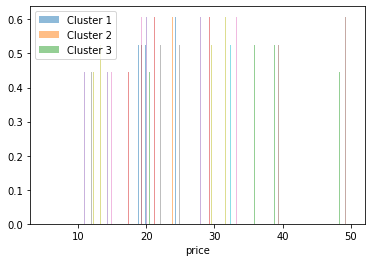

In [112]:
plt.hist(y_train[labels_train==0], bins = 20, density = True, alpha=0.5)
plt.hist(y_train[labels_train==1], bins = 20, density = True, alpha=0.5)
plt.hist(y_train[labels_train==2], bins = 20, density = True, alpha=0.5)
plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.xlabel('price')

In [95]:
x_train.loc[labels_train==0, 'RM'].mean()

6.653494117647063

In [96]:
x_train.loc[labels_train==1, 'RM'].mean()

6.3990209424083755

In [97]:
x_train.loc[labels_train==2, 'RM'].mean()

5.9676562499999966

Text(0.5, 0, 'RM (average number of rooms per dwelling)')

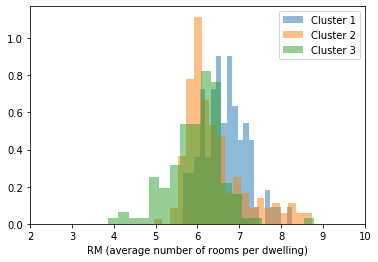

In [122]:
plt.hist(x_train.loc[labels_train==0, 'RM'], bins = 20, density = True, alpha=0.5)
plt.hist(x_train.loc[labels_train==1, 'RM'], bins = 20, density = True, alpha=0.5)
plt.hist(x_train.loc[labels_train==2, 'RM'], bins = 20, density = True, alpha=0.5)
plt.xlim(2, 10)
plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.xlabel('RM (average number of rooms per dwelling)')

In [98]:
x_train.loc[labels_train==0, 'CRIM'].mean()

0.0721184705882353

In [99]:
x_train.loc[labels_train==1, 'CRIM'].mean()

0.42098554973821983

In [88]:
x_train.loc[labels_train==2, 'CRIM'].mean()

10.715219062500003

Text(0.5, 0, 'CRIM (per capita crime rate by town)')

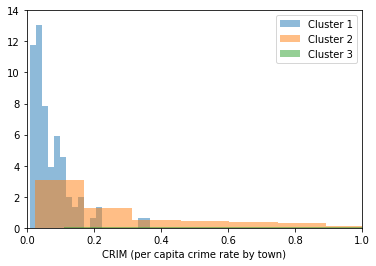

In [133]:
plt.hist(x_train.loc[labels_train==0, 'CRIM'], bins = 20, density = True, alpha=0.5)
plt.hist(x_train.loc[labels_train==1, 'CRIM'], bins = 20, density = True, alpha=0.5)
plt.hist(x_train.loc[labels_train==2, 'CRIM'], bins = 20, density = True, alpha=0.5)
plt.xlim(0, 1)
plt.ylim(0, 14)
plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.xlabel('CRIM (per capita crime rate by town)')

Text(0.5, 0, 'NOX\nnnitrix oxides concentration (parts per 10 million)')

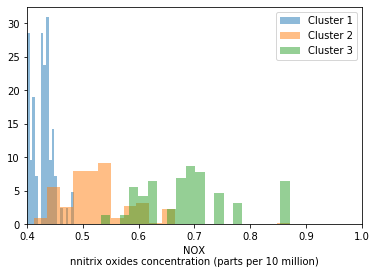

In [105]:
plt.hist(x_train.loc[labels_train==0, 'NOX'], bins = 20, density = True, alpha=0.5)
plt.hist(x_train.loc[labels_train==1, 'NOX'], bins = 20, density = True, alpha=0.5)
plt.hist(x_train.loc[labels_train==2, 'NOX'], bins = 20, density = True, alpha=0.5)
plt.xlim(0.4, 1)
plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.xlabel('NOX\nnnitrix oxides concentration (parts per 10 million)')

In [117]:
x_train.loc[labels_train==0, 'NOX'].mean()

0.42574823529411765

In [118]:
x_train.loc[labels_train==1, 'NOX'].mean()

0.5247801047120413

In [107]:
x_train.loc[labels_train==2, 'NOX'].mean()

0.690609375